imports and drive connection

In [2]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


EXPERIMENTAL CURVE:
experimental csv dataset, luminosity normalization, range restriction, relative position centering and plot

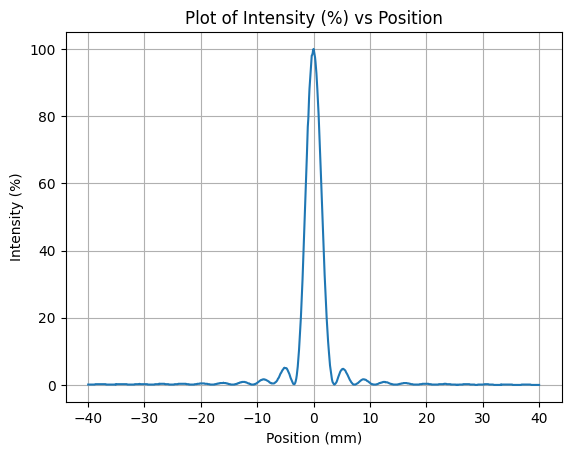

In [5]:
difPath = '/content/drive/MyDrive/colab/diffraction - diffraction.csv'
difData = pd.read_csv(difPath, decimal=',')

maximum_x = difData.loc[difData['Light Intensity (%) Run #1'].idxmax(), 'Position (mm) Run #1']

def relx(x, max = maximum_x):
  return x - max

difData['relative positions'] = (relx(difData['Position (mm) Run #1']))

rng = 40

maximum_y = difData['Light Intensity (%) Run #1'].max()
minimum_y = difData['Light Intensity (%) Run #1'].min()

difData['intensities normalized'] = ((difData['Light Intensity (%) Run #1'] - minimum_y) / (maximum_y - minimum_y)) * 100 # normalization

difData = difData[(difData['relative positions'] >= -1 * rng) &
                           (difData['relative positions'] <= rng) &
                           (difData['intensities normalized'] >= 0)]



plt.plot(difData['relative positions'], difData['intensities normalized'])
plt.xlabel('Position (mm)')
plt.ylabel('Intensity (%)')
plt.title('Plot of Intensity (%) vs Position')
plt.grid(True)

plt.show()

In [6]:
maximum_x

75.29

function to calculate the teorical intensity

In [7]:
Izero = 1e12
PI = math.pi

def teorical_intensity(y, L, lmb, a):    # only size of fenditure (only one, not distance)
  sintheta = math.sin(math.atan((y * 1e-3) / L))
  phi = (PI * a * sintheta)/lmb
  I = Izero * ((math.sin(phi)**2) / (phi**2))
  return I

TEORICAL CURVE: point-wise calculation and dataframe

In [8]:
teorical_curve = []
lamb = 6.5e-7
L = 0.9
a = 0.16e-3


for i in np.arange(0, 150, 0.1):
  teorical_curve.append([i, teorical_intensity(relx(i), L, lamb, a)])

column_name = ["position", "intensity"]
teorical_df = pd.DataFrame(teorical_curve, columns=column_name)

normalization and relative position centering

In [9]:
teorical_maximum_y = teorical_df['intensity'].max()
teorical_minimum_y = teorical_df['intensity'].min()

teorical_df['intensities normalized'] = ((teorical_df['intensity'] - teorical_minimum_y) / (teorical_maximum_y - teorical_minimum_y)) * 100
teorical_df['relative positions'] = (relx(teorical_df['position']))

range renstriction and plot

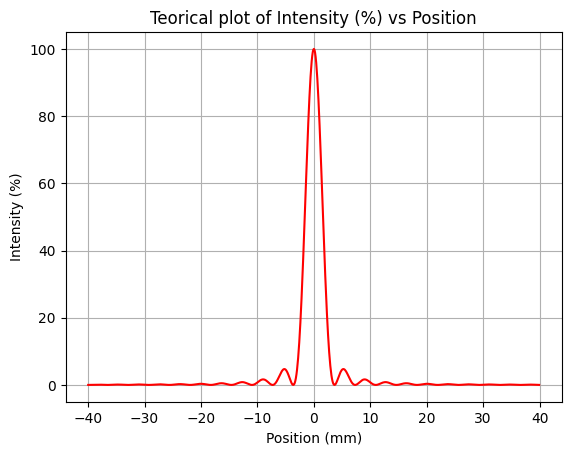

In [10]:


maximum_xt = teorical_df.loc[teorical_df['intensities normalized'].idxmax(), 'relative positions']
rng = 40

teorical_df = teorical_df[(teorical_df['relative positions'] >=  -1 * rng) &
                           (teorical_df['relative positions'] <= rng) &
                           (teorical_df['intensities normalized'] >= 0)]

plt.plot(teorical_df['relative positions'], teorical_df['intensities normalized'], color='red')
plt.xlabel('Position (mm)')
plt.ylabel('Intensity (%)')
plt.title('Teorical plot of Intensity (%) vs Position')
plt.grid(True)

plt.show()

COMPARISON BETWEEN EXPERIMENTAL PLOT (BLUE) AND TEORICAL PLOT (RED)

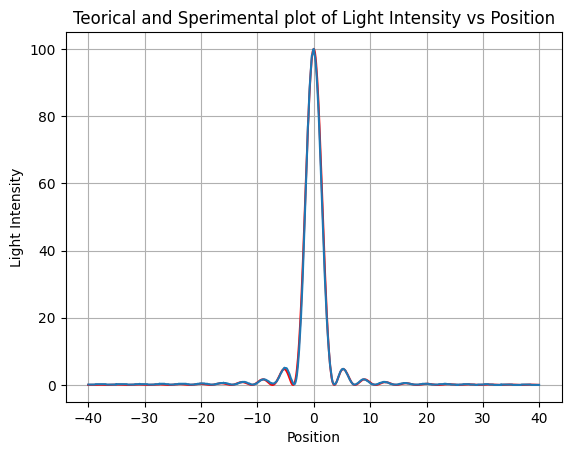

In [ ]:
plt.plot(teorical_df['relative positions'], teorical_df['intensities normalized'], color='red')
plt.plot(difData['relative positions'], difData['intensities normalized'])
plt.xlabel('Position')
plt.ylabel('Light Intensity')
plt.title('Teorical and Sperimental plot of Light Intensity vs Position')
plt.grid(True)

plt.show()